In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df= load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
dataset = pd.DataFrame(df.data)
dataset

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
dataset.columns = df.feature_names
dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
dataset['target'] = df.target

In [6]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [7]:
x= dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size =0.2)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


## Linear Regression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_linreg = lin_reg.predict(x_test)
r2_score(y_test,y_pred_linreg)

0.45260660216173787

## Ridge Regression

In [11]:
ridge_regressor = Ridge(alpha = 1e-1)
ridge_regressor.fit(x_train,y_train)
y_pred_ridge = ridge_regressor.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.46085316782973296

## Lasso Regression

In [12]:
lasso_regressor = Lasso(alpha = 1e-1)
lasso_regressor.fit(x_train,y_train)
y_pred_lasso = lasso_regressor.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.47185526169086933

## ElasticNet

In [13]:
els_regressor = ElasticNet(alpha = 0.005,l1_ratio=0.9)
els_regressor.fit(x_train,y_train)
y_pred_els = els_regressor.predict(x_test)
r2_score(y_test,y_pred_els)

0.46192611878990764

## Checking Multicolinearty

In [14]:
import statsmodels.api as sm

In [15]:
sm.add_constant(x_train)

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,1.0,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078
66,1.0,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633
137,1.0,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504
245,1.0,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483
31,1.0,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499
...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
270,1.0,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491
348,1.0,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078
435,1.0,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357


In [16]:
model_ols = sm.OLS(y_train,x_train).fit()

In [17]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.110
Method:                 Least Squares   F-statistic:                              5.378
Date:                Sun, 06 Aug 2023   Prob (F-statistic):                    2.13e-07
Time:                        17:02:44   Log-Likelihood:                         -2293.0
No. Observations:                 353   AIC:                                      4606.
Df Residuals:                     343   BIC:                                      4645.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          125.2081    206.271      0.607      0.544    -280.507     530.924
sex         -258.2036    204.877     -1.260      0.208    -661.177     144.770
bmi          627.4875    229.885      2.730      0.007     175.325    1079.650
bp           346.3186    213.207      1.624      0.105     -73.039     765.676
s1          -803.2240   1347.949     -0.596      0.552   -3454.510    1848.062
s2           312.8181   1087.888      0.288      0.774   -1826.953    2452.589
s3            45.0676    696.193      0.065      0.948   -1324.277    1414.412
s4           211.9779    553.944      0.383      0.702    -877.577    1301.532
s5           700.8248    574.988      1.219      0.224    -430.122    1831.771
s6           144.6897    219.349      0.660      0.510    -286.749     576.128
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.510
Skew:                           0.033   Prob(JB):                        0.775
Kurtosis:                       2.826   Cond. No.                         20.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268426,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113189,0.165951
bmi,0.184695,0.033934,1.000000,0.394313,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394313,1.000000,0.239986,0.161468,-0.120826,0.212790,0.375297,0.374646
s1,0.270283,0.021069,0.266467,0.239986,1.000000,0.891063,0.053003,0.546840,0.528539,0.330773
s2,0.218952,0.120205,0.261560,0.161468,0.891063,1.000000,-0.190658,0.654675,0.307134,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120826,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212790,0.546840,0.654675,-0.736685,1.000000,0.613471,0.431352
s5,0.268426,0.113189,0.468473,0.375297,0.528539,0.307134,-0.372437,0.613471,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374646,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


In [19]:
import pyforest

<IPython.core.display.Javascript object>

<AxesSubplot:>

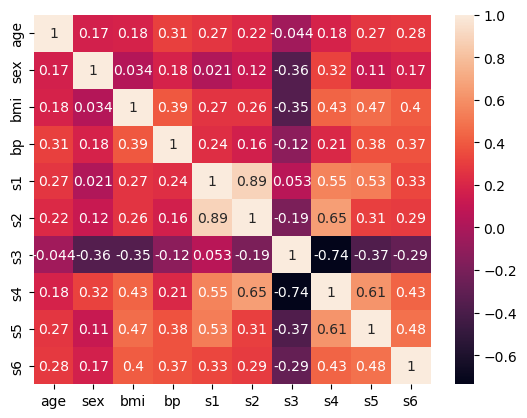

In [20]:
sns.heatmap(x_train.corr(),annot=True)

#### From above we can clearly see that this dataset has high multicolinearty.That's why Lasso is performing better.

In [32]:
from skimpy import skim

In [33]:
skim(x)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 442    │ │ float64     │ 10    │                                                          │
│ │ Number of columns │ 10     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean        ┃ sd      ┃ p0       ┃ p25      ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ age             │    0 │      0 │    -3.6e-16 │   0.048 │    -0.11 │   -0.037 │   0.038 │   0.11 │ ▃▄▆█▆▁  │  │
│ │ sex             │    0 │      0 │     1.3e-16 │   0.048 │   -0.045 │   -0.045 │   0.051 │  0.051 │ █    ▇  │  │
│ │ bmi             │    0 │      0 │      -8e-16 │   0.048 │    -0.09 │   -0.034 │   0.031 │   0.17 │  ▃█▅▃▁  │  │
│ │ bp              │    0 │      0 │     1.3e-16 │   0.048 │    -0.11 │   -0.037 │   0.036 │   0.13 │ ▁▆█▅▄▁  │  │
│ │ s1              │    0 │      0 │    -8.8e-17 │   0.048 │    -0.13 │   -0.034 │   0.028 │   0.15 │ ▁▄█▅▂▁  │  │
│ │ s2              │    0 │      0 │     1.3e-16 │   0.048 │    -0.12 │    -0.03 │    0.03 │    0.2 │  ▂██▃▁  │  │
│ │ s3              │    0 │      0 │    -4.6e-16 │   0.048 │     -0.1 │   -0.035 │   0.029 │   0.18 │  ▂█▇▃▁  │  │
│ │ s4              │    0 │      0 │     3.8e-16 │   0.048 │   -0.076 │   -0.039 │   0.034 │   0.19 │  █▆▄▂▁  │  │
│ │ s5              │    0 │      0 │    -3.8e-16 │   0.048 │    -0.13 │   -0.033 │   0.032 │   0.13 │ ▁▅█▇▃▁  │  │
│ │ s6              │    0 │      0 │    -3.4e-16 │   0.048 │    -0.14 │   -0.033 │   0.028 │   0.14 │  ▃▆█▃▁  │  │
│ └─────────────────┴──────┴────────┴─────────────┴─────────┴──────────┴──────────┴─────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [35]:
x.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01
